In [1]:
import os
from tqdm.auto import tqdm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

import autoneuronet as ann

ann.__version__

/Users/rishabalagharu/.pyenv/versions/3.13.7/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'0.1.10'

# Moons Classification with Activation Functions


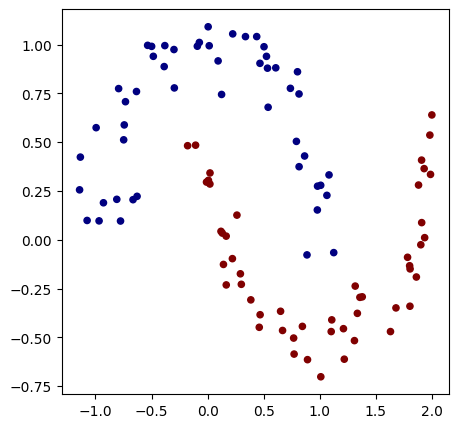

In [2]:
X, y = make_moons(n_samples=100, noise=0.1)
# X, y = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=3.0)

plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap="jet")

In [3]:
def numpy_to_matrix(numpy_array: np.ndarray) -> ann.Matrix:
    numpy_array = np.asarray(numpy_array, dtype=float)

    if numpy_array.ndim == 1:
        numpy_array = numpy_array.reshape(-1, 1)
    elif numpy_array.ndim != 2:
        raise ValueError("Please pass in a 1D or 2D array")

    rows, cols = numpy_array.shape
    matrix = ann.Matrix(rows, cols)

    for i in range(rows):
        for j in range(cols):
            matrix[i, j] = float(numpy_array[i, j])

    return matrix

In [4]:
X_matrix = numpy_to_matrix(X)
y_matrix = numpy_to_matrix(y)

In [9]:
lr = 1e-2
beta1 = 0.9
beta2 = 0.999

epochs = 1000

model = ann.NeuralNetwork(
    [
        ann.Linear(2, 16, init="kaiming"),
        ann.ReLU(),
        ann.Linear(16, 16, init="kaiming"),
        ann.ReLU(),
        ann.Linear(16, 1, init="kaiming"),
        ann.Sigmoid(),
    ]
)
optimizer = ann.AdamOptimizer(learning_rate=lr, model=model, beta1=beta1, beta2=beta2)

model

NeuralNetwork =
Linear(2, 16)
ReLU()
Linear(16, 16)
ReLU()
Linear(16, 1)
Sigmoid()

In [10]:
# Training Loop

for epoch in tqdm(
    range(epochs), desc="Training the moons classification Neural Network"
):
    optimizer.resetGrad()

    # Forward pass
    y_pred = model.forward(X_matrix)

    # Calculate the loss
    loss = ann.BCELoss(y_matrix, y_pred)
    loss_val = loss.val

    # Backpropagation
    loss.setGrad(1.0)
    loss.backward()
    optimizer.optimize()

    if epoch % 100 == 0:
        print(f"Epoch: {epoch + 1} | Train Loss: {loss_val}")

Training the moons classification Neural Network:   2%|▏         | 22/1000 [00:00<00:08, 109.25it/s]

Epoch: 1 | Train Loss: 1.0137781930606282


Training the moons classification Neural Network:  12%|█▎        | 125/1000 [00:01<00:08, 104.53it/s]

Epoch: 101 | Train Loss: 0.17291684255359166


Training the moons classification Neural Network:  22%|██▏       | 223/1000 [00:02<00:06, 111.19it/s]

Epoch: 201 | Train Loss: 0.010644384255294768


Training the moons classification Neural Network:  32%|███▏      | 320/1000 [00:02<00:05, 114.36it/s]

Epoch: 301 | Train Loss: 0.002916954697025469


Training the moons classification Neural Network:  42%|████▏     | 416/1000 [00:03<00:05, 115.56it/s]

Epoch: 401 | Train Loss: 0.001408882057662482


Training the moons classification Neural Network:  52%|█████▏    | 515/1000 [00:04<00:04, 115.39it/s]

Epoch: 501 | Train Loss: 0.0008359612241953533


Training the moons classification Neural Network:  62%|██████▏   | 622/1000 [00:05<00:03, 121.70it/s]

Epoch: 601 | Train Loss: 0.0005527433703894602


Training the moons classification Neural Network:  72%|███████▏  | 722/1000 [00:06<00:02, 120.55it/s]

Epoch: 701 | Train Loss: 0.0003911147000694079


Training the moons classification Neural Network:  81%|████████▏ | 814/1000 [00:07<00:01, 117.99it/s]

Epoch: 801 | Train Loss: 0.00029063346653994925


Training the moons classification Neural Network:  92%|█████████▏| 917/1000 [00:08<00:00, 123.84it/s]

Epoch: 901 | Train Loss: 0.00022394050405209108


Training the moons classification Neural Network: 100%|██████████| 1000/1000 [00:08<00:00, 115.14it/s]


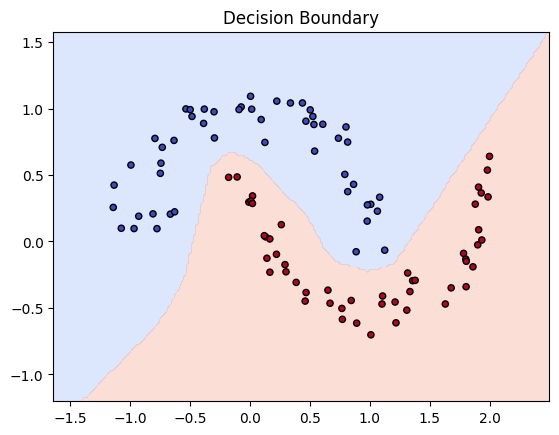

In [11]:
X = np.asarray(X)
y = np.asarray(y)

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

grid_step = 0.02

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, grid_step),
    np.arange(y_min, y_max, grid_step),
)

grid = np.c_[xx.ravel(), yy.ravel()]
grid_mat = numpy_to_matrix(grid)
preds = model.forward(grid_mat)

Z = np.array([preds[i, 0].getVal() for i in range(preds.rows)])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z > 0.5, alpha=0.3, cmap="coolwarm")
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap="coolwarm", edgecolor="k")
plt.title("Decision Boundary")
plt.show()

In [12]:
os.makedirs("models", exist_ok=True)
model.saveWeights("models/moons_model.bin")

In [9]:
model.loadWeights("models/moons_model.bin")